<a href="https://colab.research.google.com/github/EduardoAcostaC/Simulacion-I/blob/main/Ejercicio_5_4_Coss_Bu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

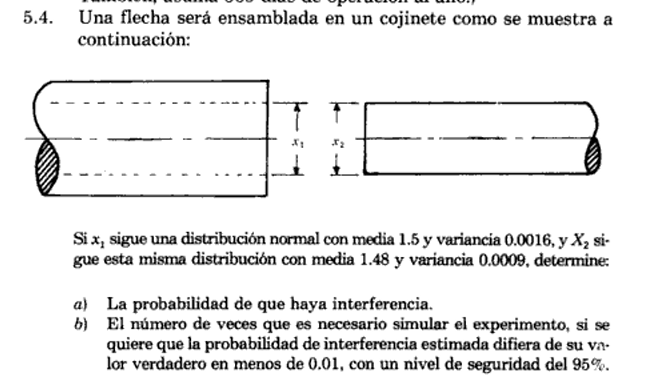

**PASO 1.** Defina las variables que intervienen en el modelo.

X₁: Diámetro del eje (variable aleatoria)

Media (μ₁) = 1.5

Varianza (σ₁²) = 0.0016

X₂: Diámetro del cojinete (variable aleatoria)

Media (μ₂) = 1.48

Varianza (σ₂²) = 0.0009

**PASO 2.** Formule la distribución de probabilidad de cada variable.


$X_1(x) = \frac{1}{0.04\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - 1.5}{0.04}\right)^2}$


$X_2(x) = \frac{1}{0.03\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - 1.48}{0.03}\right)^2}$

**PASO 3.** Modelacion de las variables

**Box-Muller:**

Ventajas:


*   Exacto (genera normales estándar perfectas, no aproximadas).
*   Eficiente (solo requiere 2 uniformes y operaciones trigonométricas por par de normales).
*   Menos llamadas a generadores de números aleatorios.

Desventaja:
* Operaciones trigonométricas pueden ser ligeramente más costosas computacionalmente.

**Aproximación con 12 uniformes (Teorema del Límite Central):**

Ventaja:

* Simple (suma de 12 uniformes estándar restando 6 → N(0,1) aproximada).

Desventajas:

* Solo es aproximada (cola de la distribución menos precisa).
* Requiere 12 generaciones de numeros aleatorios por cada normal, lo que es ineficiente.
* Error en colas (valores extremos mal simulados).

**Elección para este problema:**

Box-Muller es preferible porque:

* La precisión es crítica al evaluar colas (interferencia depende de P( X₂ >= X₁)).

* Es más eficiente en términos de calidad/costo computacional.

+ La aproximación con 12 uniformes introduce errores innecesarios.

**PASO 4.** Condición de interferencia

$X_2 >= X_1$

**PASO 5.** Genere números aleatorios.

In [41]:
import numpy as np
import matplotlib.pyplot as plt

x =100
def experimento(x):
  exitos = 0
  probabilidad = 0.0
  for i in range(x):
    x1 = np.random.normal(1.5,0.04)
    x2 = np.random.normal(1.48, 0.03)
    if x2 >= x1:
      exitos = exitos + 1
      probabilidad = exitos / x
  return probabilidad


**PASO 6.** Simulacion de muestras

In [47]:

def muestras(M):
  lista = []
  for i in range(M):
    lista.append(experimento(i+1))
  return lista

m = muestras(1000)
print(m)


[0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.42857142857142855, 0.25, 0.5555555555555556, 0.2, 0.36363636363636365, 0.3333333333333333, 0.23076923076923078, 0.21428571428571427, 0.2, 0.3125, 0.4117647058823529, 0.3888888888888889, 0.3157894736842105, 0.4, 0.38095238095238093, 0.36363636363636365, 0.43478260869565216, 0.4166666666666667, 0.48, 0.34615384615384615, 0.3333333333333333, 0.32142857142857145, 0.3448275862068966, 0.3333333333333333, 0.3870967741935484, 0.4375, 0.3333333333333333, 0.3235294117647059, 0.22857142857142856, 0.5, 0.35135135135135137, 0.42105263157894735, 0.38461538461538464, 0.375, 0.36585365853658536, 0.35714285714285715, 0.3488372093023256, 0.29545454545454547, 0.4888888888888889, 0.32608695652173914, 0.40425531914893614, 0.375, 0.3877551020408163, 0.28, 0.3333333333333333, 0.4423076923076923, 0.18867924528301888, 0.4074074074074074, 0.36363636363636365, 0.375, 0.40350877192982454, 0.3620689655172414, 0.4067796610169492, 0.48333333333333334, 0.32786885245901637, 0.30645161

**PASO 7.** Grafico de estabilizacion


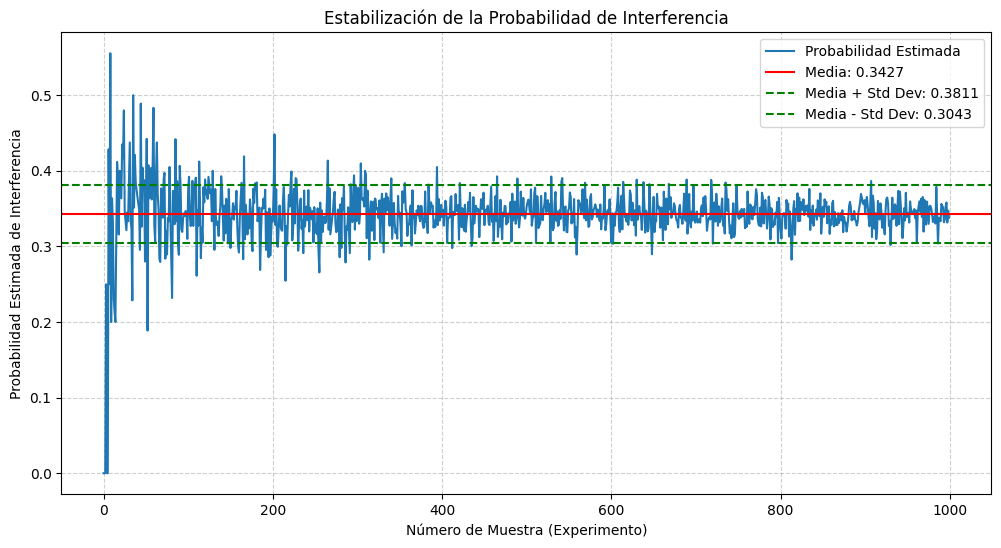

In [48]:
mean_probabilidad = np.mean(m)
std_dev_probabilidad = np.std(m)

plt.figure(figsize=(12, 6))
plt.plot(m, label='Probabilidad Estimada')
plt.axhline(mean_probabilidad, color='red', linestyle='-', label=f'Media: {mean_probabilidad:.4f}')

plt.axhline(mean_probabilidad + std_dev_probabilidad, color='green', linestyle='--', label=f'Media + Std Dev: {mean_probabilidad + std_dev_probabilidad:.4f}') # Añade una linea horizontal para la media + desviacion estandar
plt.axhline(mean_probabilidad - std_dev_probabilidad, color='green', linestyle='--', label=f'Media - Std Dev: {mean_probabilidad - std_dev_probabilidad:.4f}') # Añade una linea horizontal para la media - desviacion estandar

plt.xlabel('Número de Muestra (Experimento)')
plt.ylabel('Probabilidad Estimada de Interferencia')
plt.title('Estabilización de la Probabilidad de Interferencia')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

**PASO 9.** Replica del modelo

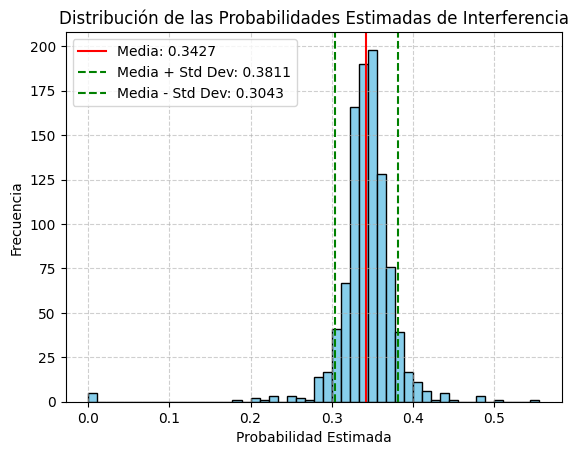

In [49]:
plt.hist(m, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de las Probabilidades Estimadas de Interferencia')
plt.xlabel('Probabilidad Estimada')
plt.ylabel('Frecuencia')
plt.axvline(mean_probabilidad, color='red', linestyle='-', label=f'Media: {mean_probabilidad:.4f}')

plt.axvline(mean_probabilidad + std_dev_probabilidad, color='green', linestyle='--', label=f'Media + Std Dev: {mean_probabilidad + std_dev_probabilidad:.4f}') # Añade una linea horizontal para la media + desviacion estandar
plt.axvline(mean_probabilidad - std_dev_probabilidad, color='green', linestyle='--', label=f'Media - Std Dev: {mean_probabilidad - std_dev_probabilidad:.4f}') # Añade una linea horizontal para la media - desviacion estandar
plt.grid(axis='y', alpha=0.75)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

**PASO 9.** Probabilidad de interferencia




In [50]:
mean_probabilidad = np.mean(m)
print("La probabilidad promedio de interferencia es: %s " % mean_probabilidad)


La probabilidad promedio de interferencia es: 0.34272207423559137 


**PASO 1O.** Cálculo de simulaciones necesarias

In [51]:
import pandas as pd
from scipy import stats

todos_los_datos = pd.Series(m)
valor_esperado = todos_los_datos.mean()

diferencia_maxima = 0.01
nivel_confianza = 0.95

media = todos_los_datos.mean()
desviacion = todos_los_datos.std()
n = len(todos_los_datos)
error_estandar = desviacion / np.sqrt(n)
intervalo_confianza = stats.norm.interval(nivel_confianza, loc=media, scale=error_estandar)

limite_inferior = valor_esperado - diferencia_maxima
limite_superior = valor_esperado + diferencia_maxima

print(f"Media muestral: {media:.4f}")
print(f"Intervalo de confianza del 95%: ({intervalo_confianza[0]:.4f}, {intervalo_confianza[1]:.4f})")
print(f"Rango aceptable: ({limite_inferior:.4f}, {limite_superior:.4f})")

# Prueba de hipótesis
if (intervalo_confianza[0] >= limite_inferior and intervalo_confianza[1] <= limite_superior):
    print("\033[1;32mLa diferencia con el valor esperado es menor a 0.01 con un 95% de confianza\033[0m")
else:
    print("\033[1;31mNo se puede afirmar que la diferencia con el valor esperado sea menor a 0.01 con un 95% de confianza\033[0m")


probabilidad = stats.norm()

Media muestral: 0.3427
Intervalo de confianza del 95%: (0.3403, 0.3451)
Rango aceptable: (0.3327, 0.3527)
La diferencia con el valor esperado es menor a 0.01 con un 95% de confianza


**Solución Analitica**

$a)$
Con diferencia de Distribuciones (ya que tenemos dos distribuciones normales)

Tenemos

$$\mu_1 = 1.5, \text{ } \sigma_1 = 0.04$$

$$\mu_2 = 1.48, \text{ } \sigma_2 = 0.03$$

Definimos $D$ como la diferencia

$$D = x_2 - x_1 $$

$$ \mu = \mu_2 - \mu_1 = 1.48 - 1.5 = -0.02$$

$$\sigma^2 = \sigma_1^2 + \sigma_2^2 = 0.0025$$

$$\sigma = 0.05$$

Por lo tanto tenemos:

$$X \sim N (-0.02, 0.05)$$

**Probabilidad**

$$P(x_2-x_1 \geq 0)= \int_0^{x_2-x_1}\frac{1}{\sqrt{2 \pi}\sigma}e^{-\frac{(t-\mu)^2}{2(\sigma)^2}}dx=0.3446 $$

---
$b)$
# Cálculo del Intervalo de Confianza

## Datos:
- **Media (μ)**: 0.3446  
- **Desviación estándar (σ)**: 0.05  
- **Tamaño de muestra (n)**: 1000  
- **Nivel de confianza**: 95% → $ Z_{\alpha/2} = 1.96 $  

## Fórmula del intervalo:
$$
\mu \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

## Cálculos:
1. **Margen de error (E)**:
   $$
   E = 1.96 \cdot \frac{0.05}{\sqrt{1000}} = 1.96 \cdot 0.00158 \approx 0.0031
   $$

2. **Intervalo de confianza (95%)**:
   $$
   \boxed{(0.3415,\ 0.3477)}
   $$

## Nota adicional:
Si se requiere un margen de error \( E = 0.01 \), el tamaño mínimo de muestra es:
$$
n = \left(\frac{1.96 \cdot 0.05}{0.01}\right)^2 \approx 97
$$


